In [333]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Leer conjunto de datos y primer vistazo

In [334]:
# Leer el csv y sacar por pantalla las cinco primeras filas.
df = pd.read_csv("data/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Exploración de datos

In [335]:
# Descripción del conjunto de datos, estándar
df.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [336]:
# Información sobre el tipo de datos de cada feature
print("--- Información de tipos de datos ---")
df.info()

--- Información de tipos de datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null 

#### Calcular el número de nulos de cada feature

In [337]:
# Contar los nulos por variable
print("--- Valores nulos por columna ---")
null_counts = df.isnull().sum()
print(null_counts)
if null_counts.sum() > 0:
    print("\nColumnas con valores nulos:")
    print(null_counts[null_counts > 0])
else:
    print("✓ No hay valores nulos en el dataset")

--- Valores nulos por columna ---
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
✓ No hay valores nulos en el dataset


#### Buscar valores extraños. Ver los valores únicos en cada feature

In [338]:
unique_values = pd.DataFrame({
    'features': df.columns,
    'n_values': [df[col].unique() for col in df.columns]
})
unique_values
unique_vals = pd.DataFrame({
    'features': df.columns,
    'n_values': [df[col].unique() for col in df.columns]
})
unique_vals

,features,n_values
0,class,"[p, e]"
1,cap-shape,"[x, b, s, f, k, c]"
2,cap-surface,"[s, y, f, g]"
3,cap-color,"[n, y, w, g, e, p, b, u, c, r]"
4,bruises,"[t, f]"
5,odor,"[p, a, l, n, f, c, y, s, m]"
6,gill-attachment,"[f, a]"
7,gill-spacing,"[c, w]"
8,gill-size,"[n, b]"
9,gill-color,"[k, n, g, p, w, h, u, e, b, r, y, o]"


In [339]:
# Obtener dataframe con features y sus valores únicos
unique_values_info = []
for col in df.columns:
    unique_vals = df[col].unique()
    unique_values_info.append({
        'features': col,
        'n_values': len(unique_vals),
        'values': str(list(unique_vals)[:10])  # Mostrar solo los primeros 10
    })

unique_df = pd.DataFrame(unique_values_info)
print("--- Valores únicos por feature ---")
unique_df[['features', 'n_values']]

--- Valores únicos por feature ---


,features,n_values
0,class,2
1,cap-shape,6
2,cap-surface,4
3,cap-color,10
4,bruises,2
5,odor,9
6,gill-attachment,2
7,gill-spacing,2
8,gill-size,2
9,gill-color,12


#### Tratar aquellos valores que entendamos que sean nulos

In [340]:
# Buscar valores que podrían representar nulos (como '?')
print("--- Verificando valores extraños ---")
strange_values_found = False
for col in df.columns:
    unique_vals = df[col].unique()
    if '?' in unique_vals:
        count_question = (df[col] == '?').sum()
        print(f" '{col}' contiene {count_question} valores '?' (posibles nulos)")
        strange_values_found = True

if not strange_values_found:
    print("✓ No se encontraron valores extraños aparentes")
    # Imputaciones: reemplazar '?' por moda o eliminar filas
    print("--- Tratamiento de valores faltantes ---")

    original_shape = df.shape
    
for col in df.columns:
    if '?' in df[col].values:
        print(f"Tratando '{col}'...")
        # Opción 1: Imputar con la moda
        df[col] = df[col].replace('?', np.nan)
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        print(f"  → Imputado con moda: {mode_value}")

print(f"✓ Dataset shape: {original_shape} → {df.shape}")


--- Verificando valores extraños ---
 'stalk-root' contiene 2480 valores '?' (posibles nulos)
Tratando 'stalk-root'...
  → Imputado con moda: b
✓ Dataset shape: (8124, 22) → (8124, 23)


#### Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla

In [341]:
# Eliminar features que no aportan información (solo un valor único)

print("--- Verificando features informativas ---")
single_value_cols = []
for col in df.columns:
    unique_count = df[col].nunique()
    if unique_count <= 1:
        single_value_cols.append(col)
        print(f"⚠️  '{col}' tiene solo {unique_count} valor único")

if single_value_cols:
    df = df.drop(columns=single_value_cols)
    print(f"✓ Eliminadas {len(single_value_cols)} columnas sin información")
else:
    print("✓ Todas las features aportan información")

print(f"Forma final del dataset: {df.shape}")

--- Verificando features informativas ---
⚠️  'veil-type' tiene solo 1 valor único
✓ Eliminadas 1 columnas sin información
Forma final del dataset: (8124, 22)


#### Separar entre variables predictoras y variables a predecir

In [342]:
# La variable que trata de predecir este conjunto de datos es 'class' (poisonous)
target_col = 'class' if 'class' in df.columns else df.columns[0]
y = df[target_col]
X = df.drop(columns=[target_col])

print(f"Variable objetivo: {target_col}")
print(f"Variables predictoras: {X.shape[1]} features")
print(f"\n--- Distribución de la variable objetivo ---")
print(y.value_counts())
print(f"\nPorcentajes:")
print(y.value_counts(normalize=True) * 100)

Variable objetivo: class
Variables predictoras: 21 features

--- Distribución de la variable objetivo ---
class
e    4208
p    3916
Name: count, dtype: int64

Porcentajes:
class
e    51.797144
p    48.202856
Name: proportion, dtype: float64


#### Codificar correctamente las variables categóricas a numéricas

In [343]:
# One Hot Encoder
print("--- Codificación de variables categóricas ---")
print(f"Features antes del encoding: {X.shape[1]}")

# Usar pandas get_dummies para One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)
print(f"Features después del encoding: {X_encoded.shape[1]}")

# Codificar también la variable objetivo
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"\n--- Codificación variable objetivo ---")
print(f"Mapeo: {dict(zip(le.classes_, le.transform(le.classes_)))}")


--- Codificación de variables categóricas ---
Features antes del encoding: 21
Features después del encoding: 94

--- Codificación variable objetivo ---
Mapeo: {'e': np.int64(0), 'p': np.int64(1)}


#### Train test split

In [344]:
# Clasificación con Random Forest
# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.33, random_state=42, stratify=y_encoded
)

print(f"✓ Conjunto de entrenamiento: {X_train.shape}")
print(f"✓ Conjunto de prueba: {X_test.shape}")
print(f"✓ Distribución balanceada mantenida")


✓ Conjunto de entrenamiento: (5443, 94)
✓ Conjunto de prueba: (2681, 94)
✓ Distribución balanceada mantenida


## PCA

Es un conjunto de datos del que aún no hemos visto nada (no tenemos graficas) así que vamos a hacer algunas. Tenemos el problema de que son muchas variables, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

Varianza explicada por las 2 primeras componentes:
PC1: 0.180
PC2: 0.105
Total: 0.285


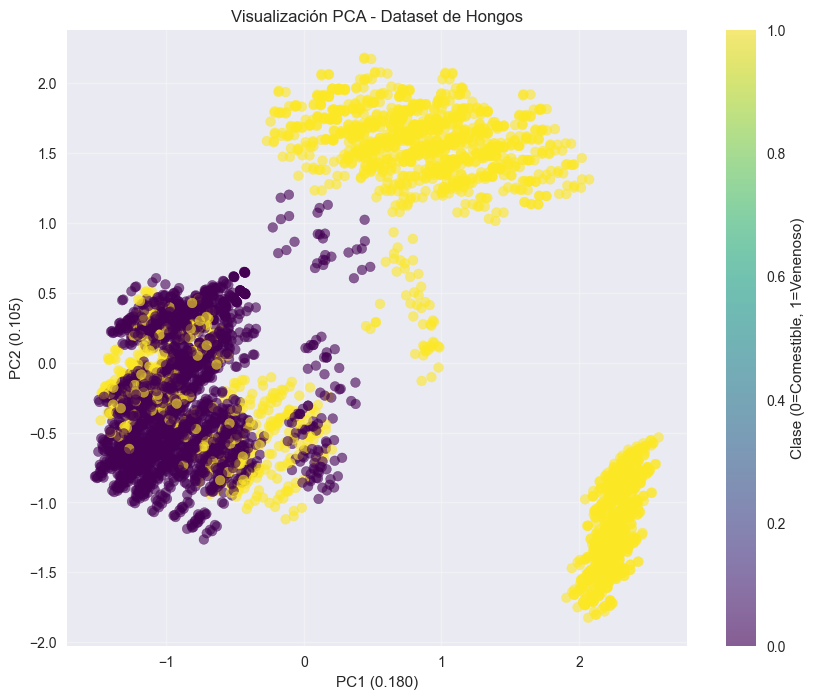

In [345]:
# PCA con 2 componentes para visualización
pca_2d = PCA(n_components=2, random_state=42)
X_train_pca_2d = pca_2d.fit_transform(X_train)

print(f"Varianza explicada por las 2 primeras componentes:")
print(f"PC1: {pca_2d.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca_2d.explained_variance_ratio_[1]:.3f}")
print(f"Total: {pca_2d.explained_variance_ratio_.sum():.3f}")

# Representar en un scatterplot con colores de las etiquetas
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], 
                     c=y_train, alpha=0.6, cmap='viridis')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.3f})')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.3f})')
plt.title('Visualización PCA - Dataset de Hongos')
plt.colorbar(scatter, label='Clase (0=Comestible, 1=Venenoso)')
plt.grid(True, alpha=0.3)
plt.show()

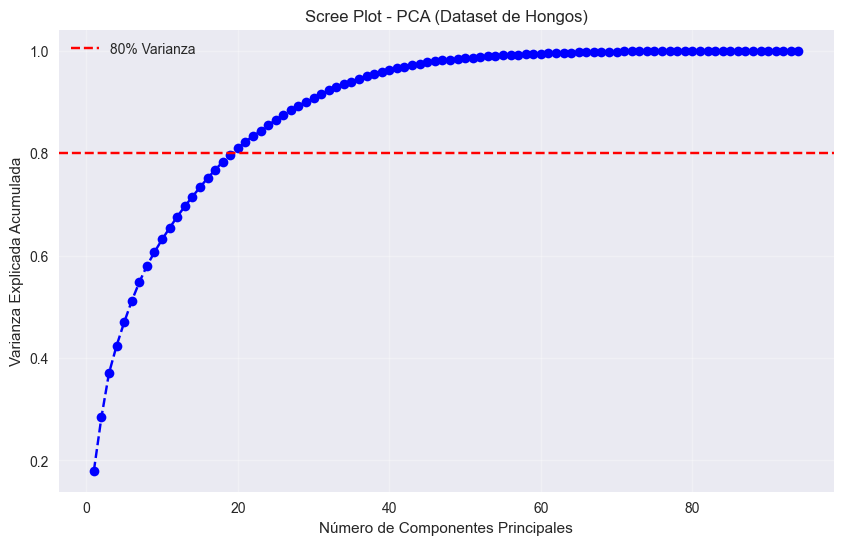

In [346]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Ajustar PCA con todos los componentes posibles
pca_full = PCA()
pca_full.fit(X_train)

# Calcular la varianza explicada acumulada
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Graficar Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var) + 1), cumulative_var, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Scree Plot - PCA (Dataset de Hongos)')
plt.grid(True, alpha=0.3)

# Línea de referencia para 80%
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Varianza')
plt.legend()
plt.show()


#### ¿Qué muestra la gráfica?
Eje X: Número de Componentes Principales (PCs), del 1 al 90+.

Eje Y: Varianza Explicada Acumulada, es decir, cuánto de la información total del dataset original se conserva al usar un cierto número de componentes principales.

Línea Azul: Representa la varianza explicada acumulada por los componentes. A medida que se agregan más componentes, la varianza explicada se incrementa hasta acercarse a 1 (100%).

Línea Roja Discontinua: Representa un umbral del 80% de varianza explicada. Es un valor típico usado para decidir cuántos componentes conservar.


Parece que está bastante separadito, parece que a ojo mucho se puede ver :

Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

In [347]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [348]:
X_train.shape

(5443, 94)

¿Muchas features no? Vamos a reducir las usando PCA.

In [349]:
n_features = range(1, X_train.shape[1]+1)
scores = []

for n in n_features:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_pca, y_train)
    score = rf.score(X_test_pca, y_test)
    scores.append(score)

sns.lineplot(x=n_features, y=scores)
plt.xlabel('Nº de Componentes PCA')
plt.ylabel('Accuracy')
plt.title('PCA + Random Forest')
plt.show()



KeyboardInterrupt: 

Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

### Optimización del número de componentes PCA

--- Optimización PCA ---
Probando PCA con 2 a 50 componentes...
  n_components=10: accuracy=0.9989
  n_components=20: accuracy=1.0000
  n_components=30: accuracy=0.9996
  n_components=40: accuracy=1.0000


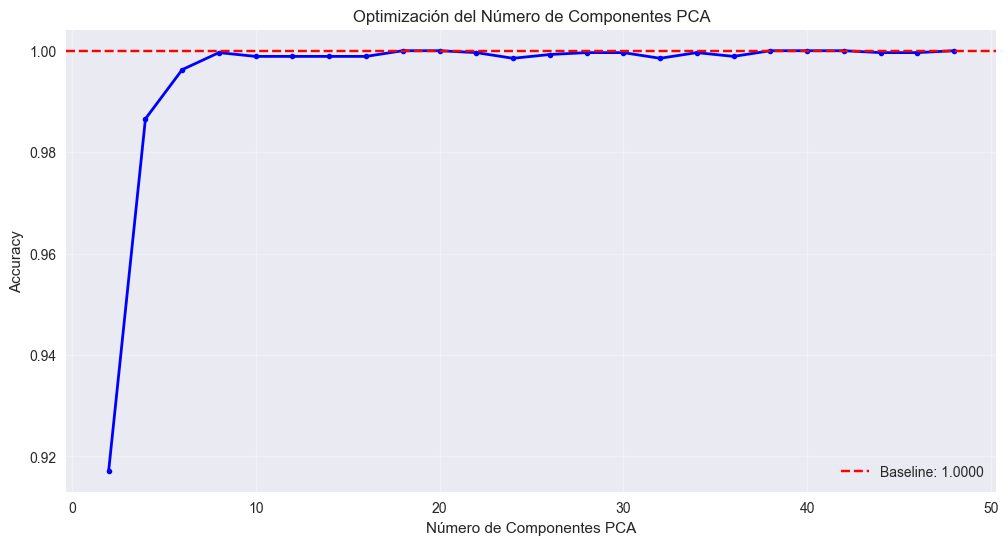


✓ Número óptimo de componentes: 18
✓ Mejor accuracy: 1.0000
✓ Reducción dimensional: 94 → 18
✓ Porcentaje de reducción: 80.9%


In [ ]:
# Buscar número óptimo de componentes
# Entrenar modelo con todos los features (sin PCA)
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print("--- Optimización PCA ---")
max_components = min(50, X_train.shape[1])  # Limitar para eficiencia
n_features = range(2, max_components, 2)
scores = []

print(f"Probando PCA con 2 a {max_components} componentes...")
for n in n_features:
    # PCA
    pca = PCA(n_components=n, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_pca, y_train)
    y_pred = rf.predict(X_test_pca)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    
    if n % 10 == 0:
        print(f"  n_components={n}: accuracy={score:.4f}")

# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(n_features, scores, 'bo-', linewidth=2, markersize=4)
plt.axhline(y=accuracy_baseline, color='r', linestyle='--', 
           label=f'Baseline: {accuracy_baseline:.4f}')
plt.xlabel('Número de Componentes PCA')
plt.ylabel('Accuracy')
plt.title('Optimización del Número de Componentes PCA')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Resultado óptimo
optimal_n = n_features[np.argmax(scores)]
optimal_score = max(scores)
print(f"\n✓ Número óptimo de componentes: {optimal_n}")
print(f"✓ Mejor accuracy: {optimal_score:.4f}")
print(f"✓ Reducción dimensional: {X_train.shape[1]} → {optimal_n}")
print(f"✓ Porcentaje de reducción: {(1-optimal_n/X_train.shape[1])*100:.1f}%")

### Clasificador baseline

In [ ]:
# Entrenar Random Forest con todas las features
print("--- Clasificador Baseline (todas las features) ---")
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print(f"✓ Precisión con {X_train.shape[1]} features: {accuracy_baseline:.4f}")
print(f"✓ Reporte de clasificación:")
print(classification_report(y_test, y_pred_baseline))

--- Clasificador Baseline (todas las features) ---
✓ Precisión con 94 features: 1.0000
✓ Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1389
           1       1.00      1.00      1.00      1292

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



## Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais.

### Búsqueda del K óptimo

--- Clustering con 20 componentes PCA ---
Evaluando diferentes valores de K...
K=2: Inercia=31346, Silhouette=0.198
K=3: Inercia=26448, Silhouette=0.229
K=4: Inercia=23233, Silhouette=0.239
K=5: Inercia=21009, Silhouette=0.258
K=6: Inercia=19281, Silhouette=0.280
K=7: Inercia=18449, Silhouette=0.271
K=8: Inercia=17127, Silhouette=0.299
K=9: Inercia=16289, Silhouette=0.307
K=10: Inercia=15890, Silhouette=0.276


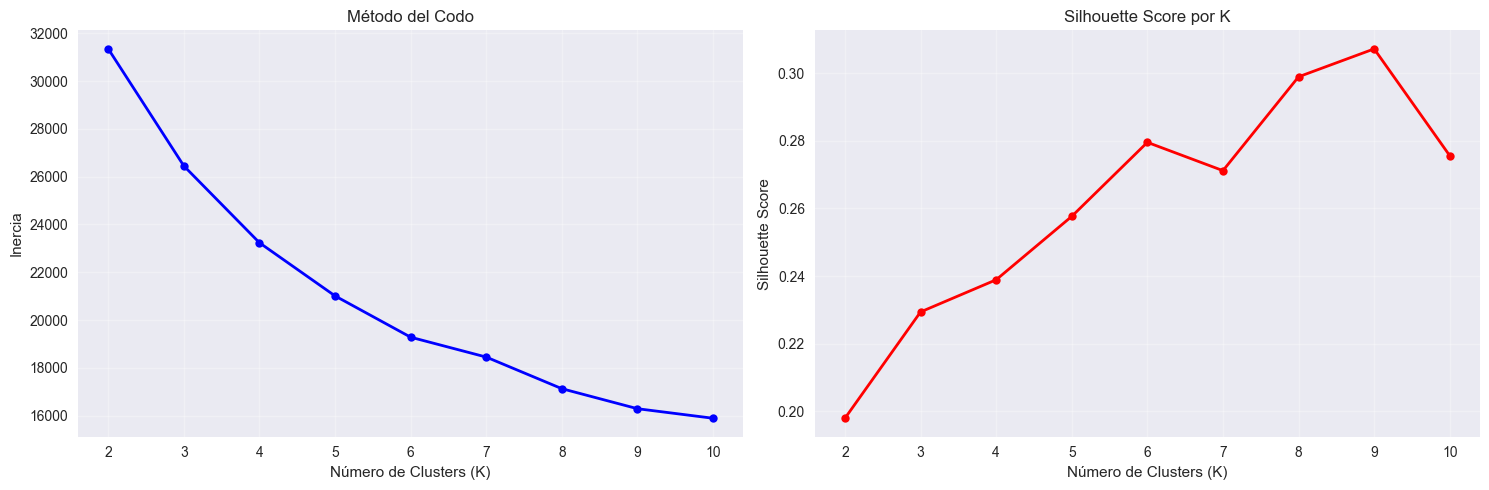


✓ K óptimo (Silhouette Score): 9


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Clustering con K-means

# Preparar datos para clustering (usar PCA para reducir dimensionalidad)
pca_clustering = PCA(n_components=min(20, X_train.shape[1]), random_state=42)
X_clustering = pca_clustering.fit_transform(X_train)

print(f"--- Clustering con {X_clustering.shape[1]} componentes PCA ---")

# Método del codo y Silhouette Score
k_values = range(2, 11)
inertias = []
silhouette_scores = []

print("Evaluando diferentes valores de K...")
for k in k_values:
    # K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_clustering)
    
    # Métricas
    inertia = kmeans.inertia_
    sil_score = silhouette_score(X_clustering, cluster_labels)
    
    inertias.append(inertia)
    silhouette_scores.append(sil_score)
    
    print(f"K={k}: Inercia={inertia:.0f}, Silhouette={sil_score:.3f}")

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Método del codo
ax1.plot(k_values, inertias, 'bo-', linewidth=2, markersize=6)
ax1.set_xlabel('Número de Clusters (K)')
ax1.set_ylabel('Inercia')
ax1.set_title('Método del Codo')
ax1.grid(True, alpha=0.3)

# Silhouette Score
ax2.plot(k_values, silhouette_scores, 'ro-', linewidth=2, markersize=6)
ax2.set_xlabel('Número de Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score por K')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# K óptimo
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"\n✓ K óptimo (Silhouette Score): {optimal_k}")

### Visualización 2D de clusters (PCA + KMeans)

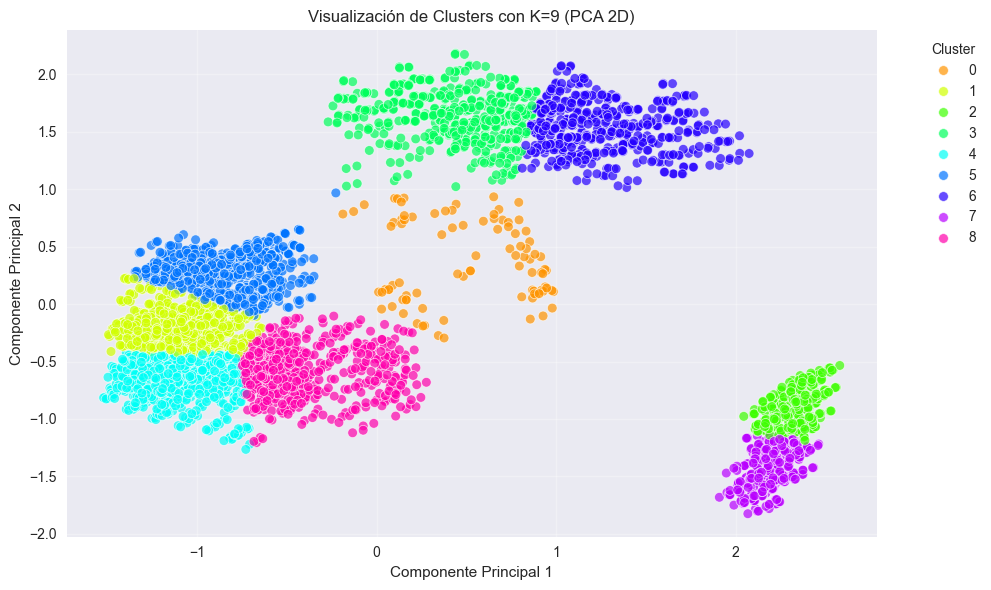

In [ ]:
# Reducir a 2 componentes para visualización
pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X_train)

# Aplicar KMeans con el K óptimo
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels_opt = kmeans_opt.fit_predict(X_2d)

# Graficar
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hsv", optimal_k)

sns.scatterplot(
    x=X_2d[:, 0], y=X_2d[:, 1],
    hue=cluster_labels_opt,
    palette=palette,
    legend="full", alpha=0.7
)

plt.title(f"Visualización de Clusters con K={optimal_k} (PCA 2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True, alpha=0.3)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

--- K-means con K=9 ---
✓ Clustering completado
✓ Adjusted Rand Index: 0.270
✓ Normalized Mutual Information: 0.424


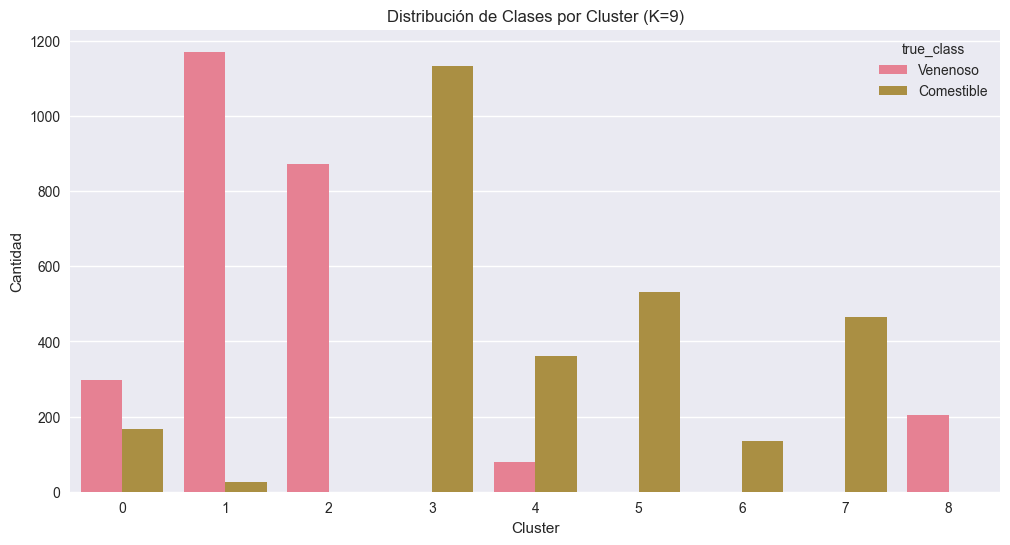


--- Análisis por cluster ---

Cluster 0 (n=466):
  Venenoso: 298 (63.9%)
  Comestible: 168 (36.1%)

Cluster 1 (n=1198):
  Venenoso: 1171 (97.7%)
  Comestible: 27 (2.3%)

Cluster 2 (n=872):
  Venenoso: 872 (100.0%)

Cluster 3 (n=1134):
  Comestible: 1134 (100.0%)

Cluster 4 (n=440):
  Comestible: 360 (81.8%)
  Venenoso: 80 (18.2%)

Cluster 5 (n=531):
  Comestible: 531 (100.0%)

Cluster 6 (n=135):
  Comestible: 135 (100.0%)

Cluster 7 (n=464):
  Comestible: 464 (100.0%)

Cluster 8 (n=203):
  Venenoso: 203 (100.0%)


In [356]:
# Entrenar K-means final
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_predictions = kmeans.fit_predict(X_clustering)

print(f"--- K-means con K={optimal_k} ---")
print(f"✓ Clustering completado")

# Evaluar calidad del clustering
ari = adjusted_rand_score(y_train, cluster_predictions)
nmi = normalized_mutual_info_score(y_train, cluster_predictions)

print(f"✓ Adjusted Rand Index: {ari:.3f}")
print(f"✓ Normalized Mutual Information: {nmi:.3f}")

# Preparar datos para análisis
cluster_analysis = pd.DataFrame({
    'cluster': cluster_predictions,
    'true_class': ['Venenoso' if x == 1 else 'Comestible' for x in y_train]
})

# Crear catplot para ver distribución
plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_analysis, x='cluster', hue='true_class')
plt.title(f'Distribución de Clases por Cluster (K={optimal_k})')
plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.show()

# Análisis detallado por cluster
print("\n--- Análisis por cluster ---")
for i in range(optimal_k):
    cluster_data = cluster_analysis[cluster_analysis['cluster'] == i]
    total = len(cluster_data)
    dist = cluster_data['true_class'].value_counts()
    
    print(f"\nCluster {i} (n={total}):")
    for class_name, count in dist.items():
        pct = (count/total)*100
        print(f"  {class_name}: {count} ({pct:.1f}%)")

### Visualización final comparativa

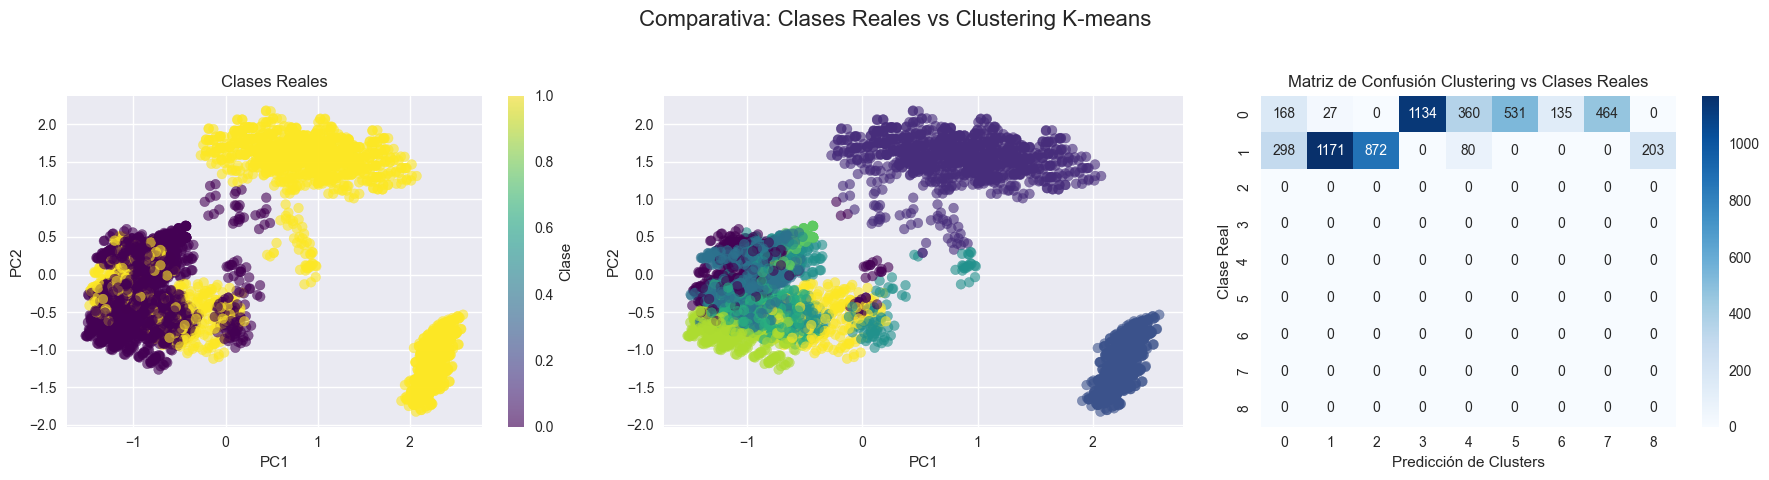

In [ ]:

# Comparar clustering vs clasificación real
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Usar PCA 2D para visualización
X_train_2d = pca_2d.transform(X_train)

# Gráfico 1: Clases reales
scatter1 = axes[0].scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                          c=y_train, alpha=0.6, cmap='viridis')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Clases Reales')
fig.colorbar(scatter1, ax=axes[0], label='Clase')

# Gráfico 2: Clusters K-means
scatter2 = axes[1].scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                          c=cluster_predictions, alpha=0.6, cmap='viridis')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')   

# Gráfico 3: Matriz de confusión
cm = confusion_matrix(y_train, cluster_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_xlabel('Predicción de Clusters')
axes[2].set_ylabel('Clase Real')
axes[2].set_title('Matriz de Confusión Clustering vs Clases Reales')
plt.suptitle('Comparativa: Clases Reales vs Clustering K-means', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar título
plt.show()

In [ ]:
## Resumen y Conclusiones
print("=== RESUMEN FINAL DEL TALLER ===")
print(f"📊 Dataset: {df.shape[0]} muestras, {X_train.shape[1]} features finales")
print(f"🎯 Accuracy baseline (todas las features): {accuracy_baseline:.4f}")
print(f"🔄 PCA óptimo: {optimal_n} componentes ({(1-optimal_n/X_train.shape[1])*100:.1f}% reducción)")
print(f"📈 Accuracy con PCA: {optimal_score:.4f}")
print(f"🎲 K-means óptimo: {optimal_k} clusters")
print(f"🤝 Concordancia clustering-clasificación (ARI): {ari:.3f}")
print(f"📊 Información mutua (NMI): {nmi:.3f}")

print("\n=== INTERPRETACIÓN DE RESULTADOS ===")

# Interpretación automática
if accuracy_baseline > 0.95:
    print("✅ Excelente separabilidad: Random Forest logra alta precisión")
else:
    print("⚠️  Separabilidad moderada: Hay overlap entre clases")

if optimal_score >= accuracy_baseline * 0.95:
    print("✅ PCA exitoso: Mantiene rendimiento con menos dimensiones")
else:
    print("⚠️  PCA con pérdida: Reducción dimensional afecta el rendimiento")

if ari > 0.5:
    print("✅ Clustering efectivo: K-means encuentra estructura similar a clases reales")
elif ari > 0.3:
    print("🔶 Clustering parcial: Hay correspondencia moderada con clases reales")
else:
    print("❌ Clustering limitado: Poca correspondencia con clases reales")

print(f"\n=== VALOR PRÁCTICO ===")
print("🔬 Este análisis demuestra:")
print("   • PCA puede reducir dimensionalidad manteniendo información clave")
print("   • K-means puede descubrir patrones sin supervisión")
print("   • La estructura natural de los datos es interpretable")

if ari > 0.4:
    print("   • Los hongos tienen patrones intrínsecos detectables sin etiquetas")
    print("   • Clustering podría usarse para clasificación preliminar")


=== RESUMEN FINAL DEL TALLER ===
📊 Dataset: 8124 muestras, 94 features finales
🎯 Accuracy baseline (todas las features): 1.0000
🔄 PCA óptimo: 18 componentes (80.9% reducción)
📈 Accuracy con PCA: 1.0000
🎲 K-means óptimo: 9 clusters
🤝 Concordancia clustering-clasificación (ARI): 0.270
📊 Información mutua (NMI): 0.424

=== INTERPRETACIÓN DE RESULTADOS ===
✅ Excelente separabilidad: Random Forest logra alta precisión
✅ PCA exitoso: Mantiene rendimiento con menos dimensiones
❌ Clustering limitado: Poca correspondencia con clases reales

=== VALOR PRÁCTICO ===
🔬 Este análisis demuestra:
   • PCA puede reducir dimensionalidad manteniendo información clave
   • K-means puede descubrir patrones sin supervisión
   • La estructura natural de los datos es interpretable


In [ ]:
# Importancia de features en PCA
print("\n--- Bonus: Features más importantes en PC1 y PC2 ---")
feature_names = X_encoded.columns
pc1_importance = pd.Series(pca_2d.components_[0], index=feature_names).abs().sort_values(ascending=False)
pc2_importance = pd.Series(pca_2d.components_[1], index=feature_names).abs().sort_values(ascending=False)

print("Top 5 features en PC1:")
print(pc1_importance.head())
print("\nTop 5 features en PC2:")
print(pc2_importance.head())



--- Bonus: Features más importantes en PC1 y PC2 ---
Top 5 features en PC1:
stalk-surface-above-ring_k    0.306059
stalk-surface-below-ring_k    0.299127
stalk-surface-above-ring_s    0.282729
ring-type_p                   0.280877
stalk-surface-below-ring_s    0.267812
dtype: float64

Top 5 features en PC2:
gill-size_n            0.371949
spore-print-color_w    0.354825
population_v           0.320014
stalk-shape_t          0.277708
spore-print-color_h    0.227718
dtype: float64
